**Regrassão Linear**

Gerando um dados de aparência linear para testar a **Solução de Forma Fechada** ou **Equação Normal**

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

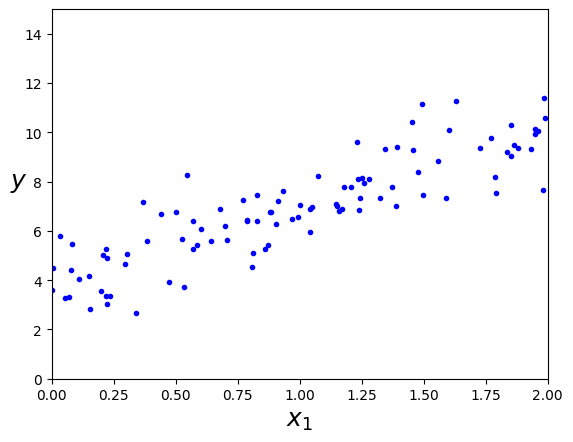

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Calculando o **θ^** usando a equação normal.

**θ = (X^T * X)⁻1 * X^T * y**

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.85045038],
       [3.13385746]])

**Destrinchando o código acima:**

np.linalg.inv(X_b.T.dot(X_b)): chamando o linalg() para poder usar a função inv() que fará a inversa da multiplicação

X_b.T.dot(X_b): Fará a multiplicação da matriz X_b transposta com a matriz X_b

(X_b.T).dot(y): multiplica a matriz transposta X_b com o vetor y

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.85045038],
       [10.11816529]])

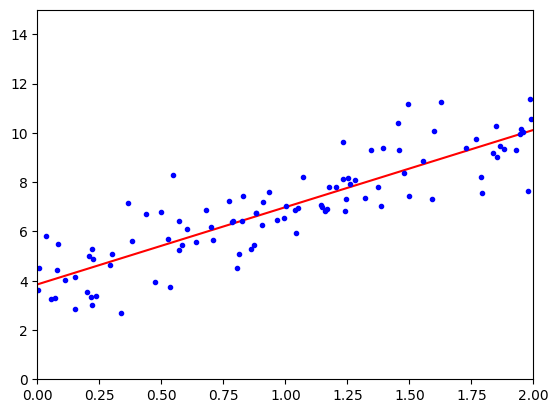

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Usando a Regressão Linear com Scikit-Learn

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.85045038]), array([[3.13385746]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.85045038],
       [10.11816529]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.85045038],
       [3.13385746]])

A classe LinearRegression é feita baseada na função scipy.linalg.lstsq()

Esta função calcula X+ a pseudoinversa de X, também pode ser calculada desta forma:

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.85045038],
       [3.13385746]])

É preferível usar a pseudoinversa, pois com ela é possível calcular matrizes que não são inversíveis.

**Gradiente Descendente**

In [10]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[3.85045038],
       [3.13385746]])

Para encontrar os melhores parâmetros podemos utilizar o GridSearch do cápitulo 2.

**Stochastic Gradient Descendent**

In [12]:
n_epochs = 50
t0, t1 = 5, 50 # learning schadule hyperparameters

def learning_schadule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # inicialização aleatória

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schadule(epoch * m + i) # learning rate
        theta = theta - eta *gradients

theta

array([[3.85354097],
       [3.1373299 ]])

Como é possivel ver, pelo **stochastic** funcionar de forma aleatória ele chega bem próximo do **theta do Batch**, porém fica oscilando perto do **mínimo global**

Performando uma regressão linear usando Stochastic GD com Scikit-Learn.

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.53184583]), array([3.40128693]))

**Hyperparameters:**

max_inter=1000: O modelo parará em **1000 épocas**


tol=1e-3: O modelo parará quando o **learning schadule for menor que 0.001** durante uma época


O modelo irá parar quando alguma destas exigências forém atingidas.

**Mini-Batch Gradient Descendent**

In [15]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [16]:
theta

array([[3.84693271],
       [3.08219989]])

Como é possível analisar, todos os gradientes ficam bem próximos, porém o único que realmente chega no mínimo global é o **Batch GD**, os outros apenas ficam oscilando em torno dele, mas como o **Mini-Batch GD** utiliza mini conjuntos aleatório em vez de uma instância aleatória como no **Stochastic GD**, ele acaba sendo mais preciso que o **Stochastic GD**.

**Regressão Polinomial**

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

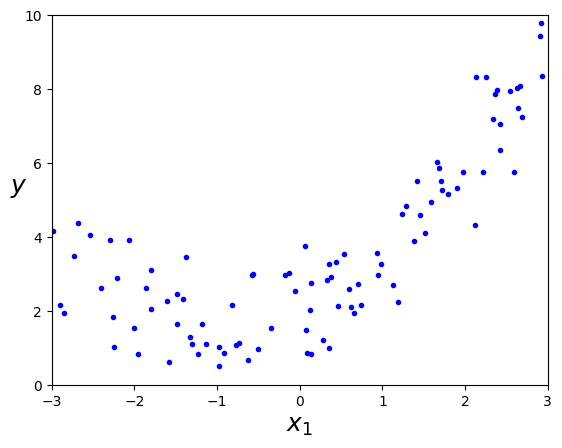

In [18]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [20]:
X[0]

array([2.38942838])

In [21]:
X_poly[0]

array([2.38942838, 5.709368  ])

**X_poly** contém o valor original de X mais o quadrado da feature

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

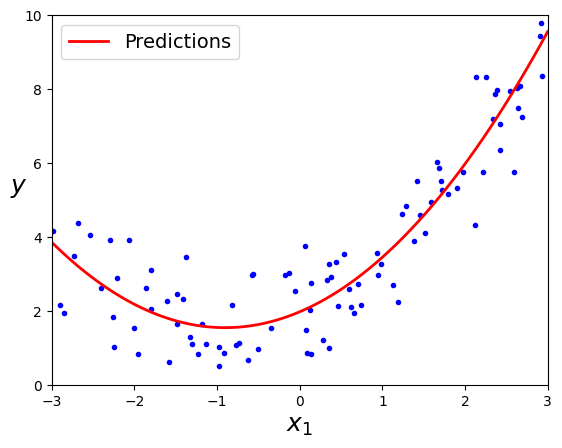

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

**Regularização de modelos lineares**

**Ridge Regression (Regularização l2)**

l2 com closed-form

In [24]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.13357033]])

l2 com Stochastic GD

In [25]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.12707461])

**Escolher entre essas abordagens (closed-form ou GD) depende do tamanho do conjunto de dados e dos requisitos de precisão e eficiência computacional.**

l1

In [26]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.09481859])

In [27]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.11142011])

Elastic Net

In [29]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.09373477])

Early Stopping

In [33]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [39]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

#preparando os dados
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=0, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/hom

In [40]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=0, warm_start=True))

**Regressão Logística**

In [42]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [44]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [47]:
X = iris["data"][:, 3:] #largura da pétala 
y = (iris["target"] == 2).astype(int) # 1 se for Iris virginica, resto 0

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

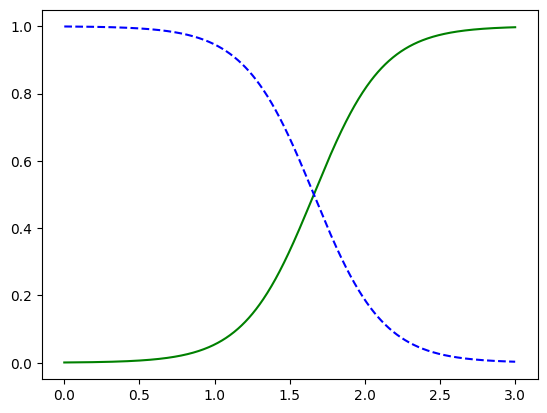

In [53]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

A linha verde seria a hipótese de ser Iris Virginica, a tracejada é a hipótese de não ser a Iris Virginica

In [50]:
X_new

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201],
       [0.01501502],
       [0.01801802],
       [0.02102102],
       [0.02402402],
       [0.02702703],
       [0.03003003],
       [0.03303303],
       [0.03603604],
       [0.03903904],
       [0.04204204],
       [0.04504505],
       [0.04804805],
       [0.05105105],
       [0.05405405],
       [0.05705706],
       [0.06006006],
       [0.06306306],
       [0.06606607],
       [0.06906907],
       [0.07207207],
       [0.07507508],
       [0.07807808],
       [0.08108108],
       [0.08408408],
       [0.08708709],
       [0.09009009],
       [0.09309309],
       [0.0960961 ],
       [0.0990991 ],
       [0.1021021 ],
       [0.10510511],
       [0.10810811],
       [0.11111111],
       [0.11411411],
       [0.11711712],
       [0.12012012],
       [0.12312312],
       [0.12612613],
       [0.12912913],
       [0.13213213],
       [0.13513514],
       [0.13813814],
       [0.141

In [51]:
y_proba

array([[9.99249051e-01, 7.50949397e-04],
       [9.99239224e-01, 7.60776030e-04],
       [9.99229269e-01, 7.70731151e-04],
       ...,
       [3.08499021e-03, 9.96915010e-01],
       [3.04523414e-03, 9.96954766e-01],
       [3.00598887e-03, 9.96994011e-01]])

In [59]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.66066066])

In [61]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Softmax

In [70]:
X = iris["data"][:, (2, 3)] # Comprimento e Largura da pétala
y = iris["target"]

In [71]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)

In [72]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [73]:
softmax_reg.predict([[5, 2]])

array([2])

In [74]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626373e-07, 5.73689802e-02, 9.42630398e-01]])